<a href="https://colab.research.google.com/github/andrewbilbrey/NLP-assignment-7/blob/master/NLP_assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is your issue of interest? Instrument reviews.

Why is this issue important? Summarize Text, Word Map, Sentiment Analysis.

What questions do you try to answer? Examine Text reviews.


Where do you get the data? https://www.kaggle.com/eswarchandt/amazon-music-reviews/data#

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load, Preview, and Clean the dataset

In [2]:
df = pd.read_csv('music_instrument_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Explore the data

In [3]:
df['overall'].value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

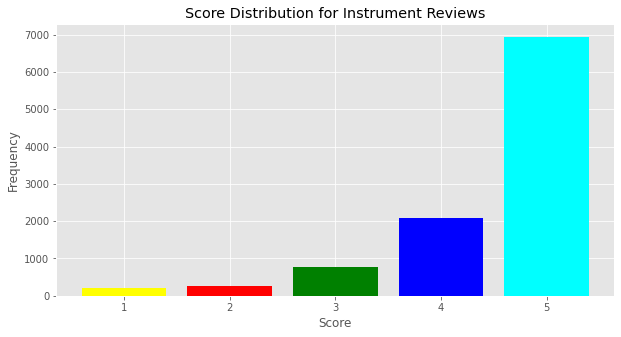

In [4]:
plt.style.use('ggplot')

score = ['1', '2', '3', '4', '5']
appear = [217, 250, 772, 2084, 6938]

x_pos = [i for i, _ in enumerate(score)]

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(x_pos, appear, color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution for Instrument Reviews")

plt.xticks(x_pos, score)

plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


# Word map of review text

In [6]:
from wordcloud import WordCloud, STOPWORDS
import imageio


df['summary']= df['summary'].astype(str)
df['len'] = df['summary'].str.len()  # Store string length of each sample
df = df.sort_values(['len'], ascending=True)
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,len
1795,A34LQ791ACZ0JC,B0002E3B78,"karaoke ""music lover""","[2, 2]",I bought this for my 1974 Martin D-18 for reco...,5,Just What I Needed,1343865600,"08 2, 2012",18
8519,A10HYGDU2NITYQ,B00466HM28,GregoryEEEE,"[0, 0]",First off this costs extra because of the drum...,3,Not Impressed,1373155200,"07 7, 2013",13
5951,A1RI71C4IQZZGF,B000Y30NAA,legendery-sound.,"[1, 2]",hey rockers!!! DON'T HESITATE BUY IT bEHRINGE...,4,[...],1339718400,"06 15, 2012",5
5841,A36OSNJ4YJSGEP,B000WN4J9S,djinx,"[7, 7]",I was upgrading all the chrome on a MIM and pu...,5,Looks Great!!!,1304467200,"05 4, 2011",14
3617,ARAK8OPNIFLHR,B0006H92QK,Customer,"[0, 0]",At last I got this mic after doing about a mon...,5,Finally,1363305600,"03 15, 2013",7


In [15]:
from PIL import Image
from wordcloud import ImageColorGenerator

exclude = ["nan", "dtype", "summary","name", "length","object"]
stopwords_new = STOPWORDS.update(exclude)    # STOPWORDS is a of tyep Set     
#stopwords_new = exclude + list(STOPWORDS)   # this works too




text = df["summary"]

wc = WordCloud(
  # width = 1200,
  # height = 500,
  # max_words=50,
   scale = 20,
  # max_font_size=20,
  
    background_color = 'white',
  
    colormap="Blues",
    stopwords = stopwords_new,
)

wc.generate(str(text))

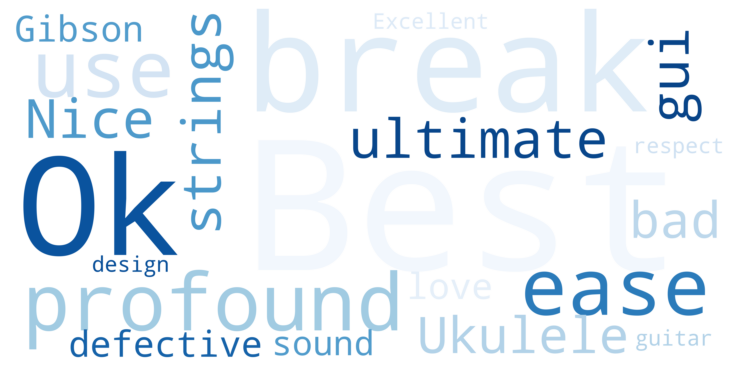

In [16]:

fig = plt.figure(
    figsize = (10,10)
   #facecolor = 'k',
   #edgecolor = 'k'
)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Sentiment Analysis

In [0]:
reviews_train = []
for line in df['summary']:
    reviews_train.append(line)
    
reviews_test = []
for line in df['summary']:
    reviews_test.append(line)

In [0]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [36]:
df['summary'].value_counts()

Great                                                                            42
Five Stars                                                                       32
Great!                                                                           30
Perfect                                                                          27
Good                                                                             25
                                                                                 ..
Junky                                                                             1
Great Fat Analog Distortion                                                       1
Great Selection                                                                   1
It's necessary, so get one already!                                               1
Elixir Strings Acoustic Phosphor Bronze Strings NANOWEB Coating, 6-String,...     1
Name: summary, Length: 8852, dtype: int64

In [0]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

In [40]:
X

<10261x4349 sparse matrix of type '<class 'numpy.int64'>'
	with 42325 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection



In [0]:
target = [1 if i < 5000 else 0 for i in range(10261)]
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, target, train_size=0.75,test_size=0.25, random_state=101)



In [69]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.7704598597038191
Accuracy for C=0.05: 0.8102104442712393
Accuracy for C=0.25: 0.8476227591582229
Accuracy for C=0.5: 0.8585346843335931
Accuracy for C=1: 0.8674980514419329


In [70]:

final_model = LogisticRegression(C=1)
final_model.fit(X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(y_val, final_model.predict(X_test)))

Final Accuracy: 0.9181605611847233


In [71]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('ok', 1.2144045494871658)
('usa', 0.9496592340115811)
('stays', 0.9333251113065859)
('plenty', 0.8074427005950288)
('me', 0.7949498397255472)


In [72]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('with', -3.552423476847914)
('inexpensive', -3.4474375694206287)
('instrument', -2.8252442765561825)
('sounding', -2.797649406142075)
('from', -2.769605360927398)
